<a href="https://colab.research.google.com/github/mkpatidar297/BMI-Calculator/blob/main/OLA_Driver_Ensemble_Learning_(Ola_driver_Churn)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# CASE STUDY OF OLA Driver Ensemble Learning (Ola driver Churn)

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

The data provided contains the monthly information for a segment of drivers for 2019 and 2020 and the task is to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

## **Importing all the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import poisson, binom
from scipy.stats import pearsonr,spearmanr
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


# Importing & Basic statistics understanding of Data-frame

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv -O "ola_driver_scaler.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 1.72MB/s]


In [ ]:
df=pd.read_csv('ola_driver_scaler.csv')

##**Column Profiling:**



In [ ]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
#dropping the column having name Unnamed as already having index
df.drop(columns=["Unnamed: 0"], inplace = True)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


*  **MMMM-YY:** Reporting Date (Monthly)

*   **Driver_ID:** Unique id for drivers

*   **Age:** Age of the driver

*   **Gender:** Gender of the driver – Male : 0, Female: 1

*   **City:** City Code of the driver

*   **Education_Level:** Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

*   **Income:** Monthly average Income of the driver

*   **Date Of Joining:** Joining date for the driver

*   **LastWorkingDate:** Last date of working for the driver

*   **Joining Designation:** Designation of the driver at the time of joining

*   **Grade:** Grade of the driver at the time of reporting

*   **Total Business Value:** The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)

*   **Quarterly Rating:** Quarterly rating of the driver: 1,2,3,4,5 (higher is better)




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
# Shape of the dataset -
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  19104
No. of columns:  13


In [ ]:
# Statistical summary of the dataset -
df.describe(include='all')

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


## **Finding out the columns with Null or NaN values**

In [ ]:
df.isnull().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

# **Feature Creation**

**Creating the Target Column - Driver Churned = 1 and Driver Not Churned = 0**

In [ ]:
def create_target(x):
  if isinstance(x, float):
      return 0
  else:
      return 1

In [ ]:
df['Target'] = df.apply(lambda x: create_target(x['LastWorkingDate']), axis=1)

In [ ]:
df["Target"].value_counts()

0    17488
1     1616
Name: Target, dtype: int64

**Creating Tenure Column**

Counting the number of days worked for Drivers who churned

For Drivers who haven't churned added 0.0 for Tenure

In [ ]:
df['Tenure'] = (pd.to_datetime(df['LastWorkingDate']) - pd.to_datetime(df['Dateofjoining']) ).dt.days

In [ ]:
df["Tenure"].fillna(0.0, inplace=True)

In [ ]:
df["Tenure"].value_counts()

0.0       17492
77.0         11
105.0        11
129.0        11
121.0        11
          ...  
1328.0        1
1098.0        1
227.0         1
349.0         1
1119.0        1
Name: Tenure, Length: 680, dtype: int64

In [ ]:
df.head(30)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Target,Tenure
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,0.0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,0.0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,77.0
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0.0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0.0
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,0,0.0
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,0,0.0
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1,0,0.0
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1,0,0.0
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1,1,142.0


In [ ]:
df.sort_values(by=["Driver_ID"])

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Target,Tenure
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,0.0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,0.0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,77.0
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0.0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2,0,0.0
19098,07/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,497690,3,0,0.0
19097,06/01/20,2788,29.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,1,0,0.0
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3,0,0.0


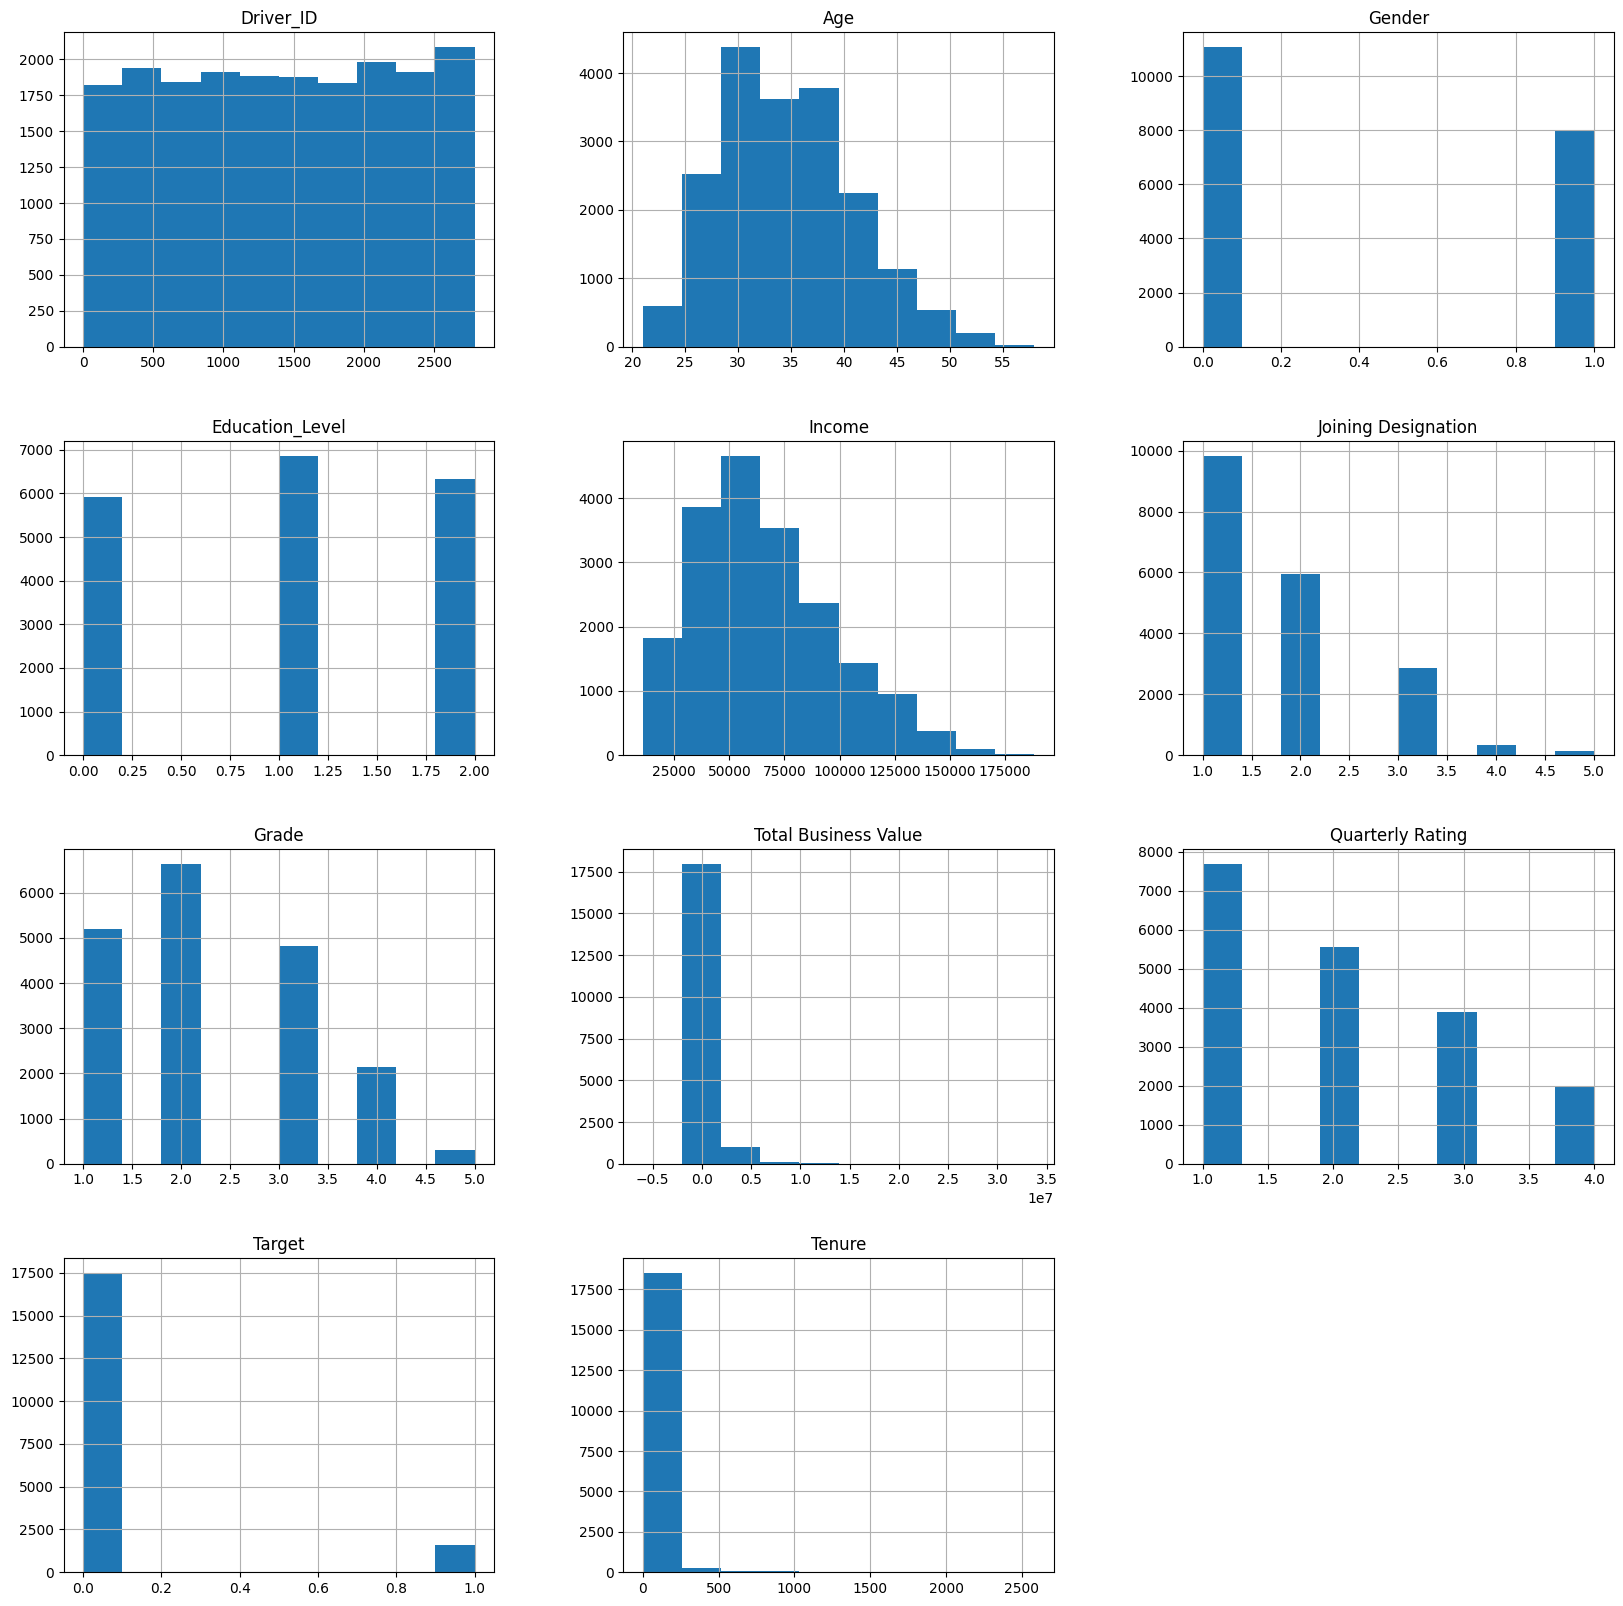

In [ ]:
df.hist(figsize = (20,20))
plt.show()

**Dropping the Date columns - MMM-YY, Date of joining and Last Working Date**

In [ ]:
df_new = df.drop(columns=["Dateofjoining", "MMM-YY","LastWorkingDate"])

In [ ]:
df_new

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Target,Tenure
0,1,28.0,0.0,C23,2,57387,1,1,2381060,2,0,0.0
1,1,28.0,0.0,C23,2,57387,1,1,-665480,2,0,0.0
2,1,28.0,0.0,C23,2,57387,1,1,0,2,1,77.0
3,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0.0
4,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,C27,2,70254,2,2,740280,3,0,0.0
19100,2788,30.0,0.0,C27,2,70254,2,2,448370,3,0,0.0
19101,2788,30.0,0.0,C27,2,70254,2,2,0,2,0,0.0
19102,2788,30.0,0.0,C27,2,70254,2,2,200420,2,0,0.0


## **Grouping the data based on Driver Id & Correlation Heatmap**

In [ ]:
df_grouped = df_new.groupby(['Driver_ID']).agg({'Age' : 'first', 'Gender':'first', 'City':'first', 'Education_Level' : 'first', 'Income': 'last', 'Joining Designation': 'last', 'Grade' : 'max','Total Business Value': 'sum', 'Quarterly Rating': 'max' , 'Tenure': 'max' ,'Target': 'last'})

In [ ]:
df_grouped.reset_index(inplace=True)

<ipython-input-24-2362666ebaa2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_grouped.corr(method='spearman'), annot=True, cmap='viridis')


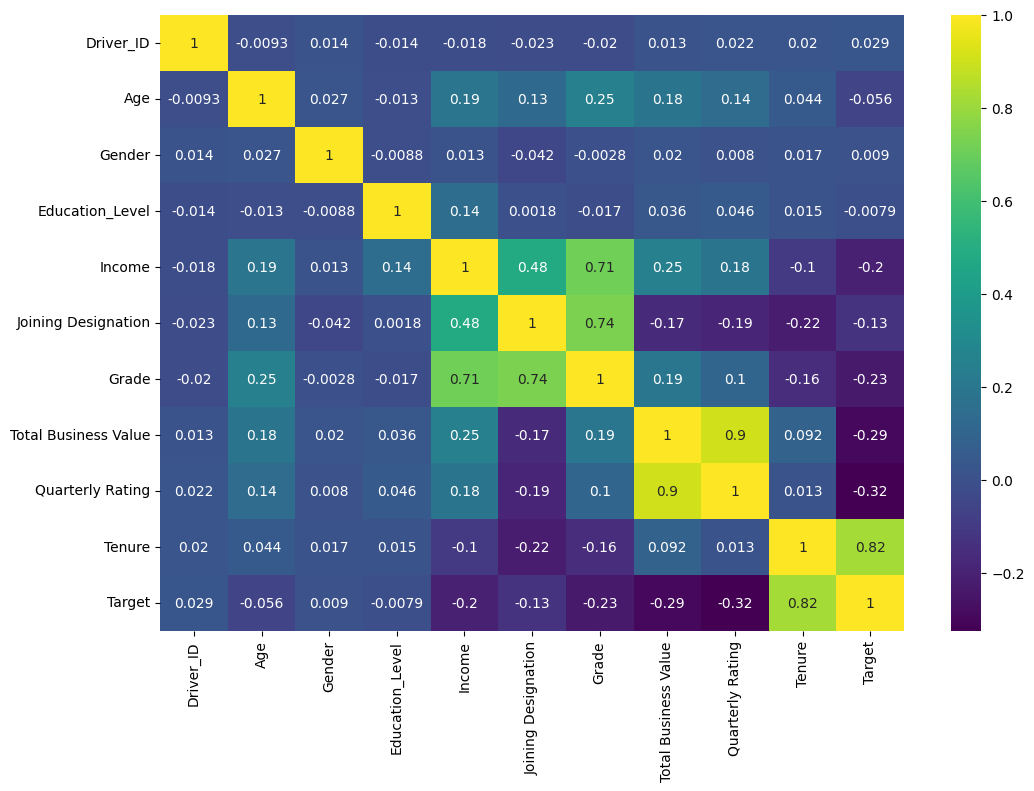

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_grouped.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()



> A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible



**The grouped data now doesn't have any null values.**

In [ ]:
df_grouped.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
Tenure                  0
Target                  0
dtype: int64

In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2381 non-null   int64  
 1   Age                   2381 non-null   float64
 2   Gender                2381 non-null   float64
 3   City                  2381 non-null   object 
 4   Education_Level       2381 non-null   int64  
 5   Income                2381 non-null   int64  
 6   Joining Designation   2381 non-null   int64  
 7   Grade                 2381 non-null   int64  
 8   Total Business Value  2381 non-null   int64  
 9   Quarterly Rating      2381 non-null   int64  
 10  Tenure                2381 non-null   float64
 11  Target                2381 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 223.3+ KB


In [ ]:
df_grouped.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.090718,0.410332,1.00756,59334.157077,1.820244,2.097018,4.586742e+06,1.929861,242.687526,0.678706
std,806.161628,5.840686,0.491997,0.81629,28383.666384,0.841433,0.941702,9.127115e+06,1.104857,411.021028,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,103.000000,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,3.000000,259.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2582.000000,1.000000


**Only categorical column left in the data is City now.**

# **One Hot Encoding for City Column**

In [ ]:
df_grouped["City"].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

In [ ]:
#dummies = ['City']
#df_grouped = pd.get_dummies(df_grouped, columns=dummies, drop_first=True)

In [ ]:
df_grouped.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.090718,0.410332,1.00756,59334.157077,1.820244,2.097018,4.586742e+06,1.929861,242.687526,0.678706
std,806.161628,5.840686,0.491997,0.81629,28383.666384,0.841433,0.941702,9.127115e+06,1.104857,411.021028,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,103.000000,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,3.000000,259.000000,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2582.000000,1.000000


**The data provided to us is of 2381 drivers. Now, the data looks good so we can do further computations.**

# **Data Preparation for Modeling**

Dropping the Driver_ID column temporarily so that we can train and test the model and the Driver_ID doesn't have effect on the predictions.

Dropping the Target column from X as X represents the features to train the model.

y is the Target value (Driver Churned or Not)

In [ ]:
X = df_grouped.drop(columns=['Target', 'Driver_ID'])
y = df_grouped['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=y, random_state=42)

In [ ]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1666, 10)
y_train dataset:  (1666,)
X_test dataset:  (715, 10)
y_test dataset:  (715,)


In [ ]:
!pip install category_encoders

import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['City'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.1 MB/s eta 0:00:00


**# MinMaxScaler**

Scaling isn't required in this as we don't have to compute the distances in Tree based algorithms.

# **Treating Imbalance data using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({1: 1131, 0: 1131})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
model = RandomForestClassifier(max_depth=6, n_estimators = 500)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500)

In [ ]:
model.score(X_train, y_train)

0.9975990396158463

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[230   0]
 [  0 485]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       485

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

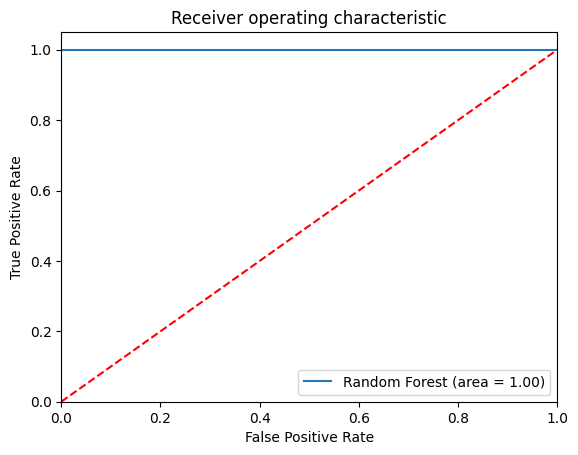

In [ ]:
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest')
plt.show()

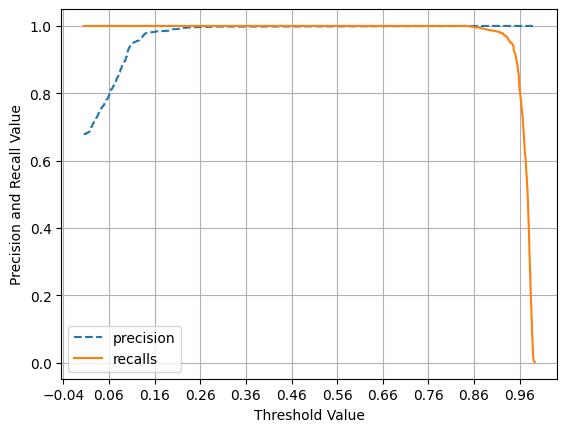

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:,1])

# **Recomendations**

The above data can be visualized using Random Forest technique. It is giving very good prediction score on training and testing data.


The most important feature here is Tenure.


Folowing Recomendation can provide:

1. Enhance Driver Engagement and Satisfaction

    *   Regular Feedback Mechanism.
    *   Driver Support Programs
    *   Recognition and Rewards:
2.  Competitive Compensation and Incentives
    *   Dynamic Incentive Structures:
    *   Loyalty Bonuses

3. Improved Driver Training and Development
4. Leverage Technology for Better Driver Experience
5. Data-Driven Insights and Personalization
